In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics


Import CSV as DataFrame

In [3]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Big%20Sales%20Data.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [5]:
df.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             9144
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.016348,0.037288,0.002878,0.228297
Item_Visibility,-0.016348,1.000000,-0.006351,-0.083678,-0.158813
Item_MRP,0.037288,-0.006351,1.000000,0.000141,0.532261
Outlet_Establishment_Year,0.002878,-0.083678,0.000141,1.000000,-0.110786
Item_Outlet_Sales,0.228297,-0.158813,0.532261,-0.110786,1.000000


## Remove Missing Value

In [9]:
df = df.dropna()

In [10]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000
...,...,...,...,...,...,...,...,...,...,...,...,...
14198,FDG47,12.8,Low Fat,0.116528,Starchy Foods,261.4252,OUT010,1998,Medium,Tier 3,Grocery Store,262.325200
14199,FDG47,12.8,Low Fat,0.069606,Starchy Foods,261.9252,OUT035,2004,Small,Tier 2,Supermarket Type1,4984.178800
14200,FDG47,12.8,Low Fat,0.070013,Starchy Foods,262.8252,OUT017,2007,Medium,Tier 2,Supermarket Type1,2885.577200
14201,FDG47,12.8,Low Fat,0.069561,Starchy Foods,263.0252,OUT013,1987,High,Tier 3,Supermarket Type1,2885.577200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11815 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            11815 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           11815 non-null  object 
 3   Item_Visibility            11815 non-null  float64
 4   Item_Type                  11815 non-null  object 
 5   Item_MRP                   11815 non-null  float64
 6   Outlet_Identifier          11815 non-null  object 
 7   Outlet_Establishment_Year  11815 non-null  int64  
 8   Outlet_Size                11815 non-null  object 
 9   Outlet_Location_Type       11815 non-null  object 
 10  Outlet_Type                11815 non-null  object 
 11  Item_Outlet_Sales          11815 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


## Data Visulization

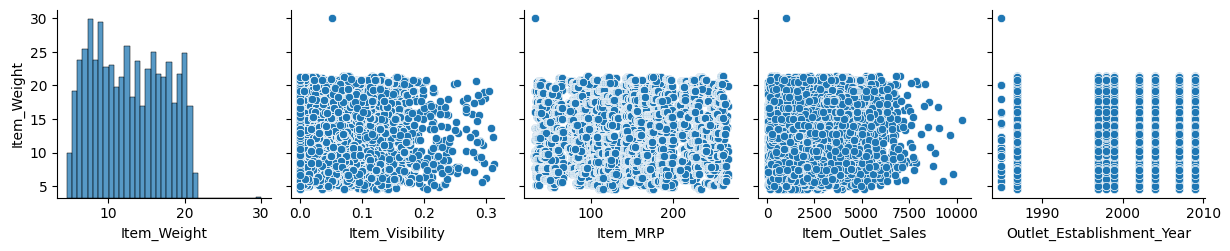

In [12]:
sns.pairplot(df,x_vars=['Item_Weight', 'Item_Visibility','Item_MRP','Item_Outlet_Sales','Outlet_Establishment_Year'], y_vars=['Item_Weight'])

<Axes: xlabel='Item_MRP', ylabel='Item_Weight'>

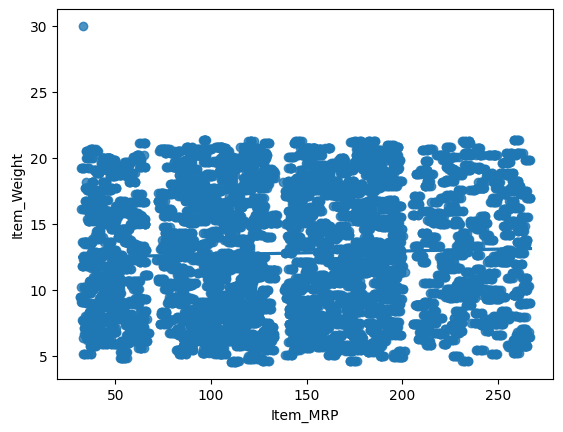

In [13]:
sns.regplot(x= 'Item_MRP', y= 'Item_Weight', data=df)

**Get Information about**

**Get Column Name**

In [14]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
y= df['Item_Weight']

In [16]:
y

0        12.3
1        12.3
2        12.3
3        12.3
4         9.8
         ... 
14198    12.8
14199    12.8
14200    12.8
14201    12.8
14203    12.8
Name: Item_Weight, Length: 11815, dtype: float64

In [17]:
y.shape

(11815,)

In [18]:
X = df[['Item_Weight', 'Item_Visibility','Item_MRP','Item_Outlet_Sales']]

In [19]:
X

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,12.3,0.111448,33.4874,436.608721
1,12.3,0.111904,33.9874,443.127721
2,12.3,0.111728,33.9874,564.598400
3,12.3,0.000000,34.3874,1719.370000
4,9.8,0.045523,35.0874,352.874000
...,...,...,...,...
14198,12.8,0.116528,261.4252,262.325200
14199,12.8,0.069606,261.9252,4984.178800
14200,12.8,0.070013,262.8252,2885.577200
14201,12.8,0.069561,263.0252,2885.577200


In [20]:
X.shape

(11815, 4)

In [21]:
X

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,12.3,0.111448,33.4874,436.608721
1,12.3,0.111904,33.9874,443.127721
2,12.3,0.111728,33.9874,564.598400
3,12.3,0.000000,34.3874,1719.370000
4,9.8,0.045523,35.0874,352.874000
...,...,...,...,...
14198,12.8,0.116528,261.4252,262.325200
14199,12.8,0.069606,261.9252,4984.178800
14200,12.8,0.070013,262.8252,2885.577200
14201,12.8,0.069561,263.0252,2885.577200


## Scalling Data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaler

StandardScaler()

In [25]:
X= scaler.fit_transform(X)

In [26]:
X

array([[-0.10493402,  0.9849658 , -1.72125137, -1.1444191 ],
       [-0.10493402,  0.994366  , -1.7132208 , -1.13977123],
       [-0.10493402,  0.99073847, -1.7132208 , -1.05316585],
       ...,
       [ 0.00250208,  0.13157633,  1.96217243,  0.60163056],
       [ 0.00250208,  0.12227259,  1.96538465,  0.60163056],
       [ 0.00250208,  0.12569509,  1.97502133,  1.14261887]])

In [27]:
pd.DataFrame(X).describe()

,0,1,2,3
count,1.181500e+04,1.181500e+04,1.181500e+04,1.181500e+04
mean,3.674495e-16,-9.983080e-17,-5.773348e-16,-9.622246e-17
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.769119e+00,-1.310395e+00,-1.756544e+00,-1.431975e+00
25%,-8.763252e-01,-7.615514e-01,-7.579708e-01,-7.733162e-01
50%,-6.195958e-02,-2.329831e-01,2.022464e-02,-2.167484e-01
75%,8.512473e-01,5.739931e-01,7.244312e-01,5.710433e-01
max,3.698304e+00,5.155366e+00,2.027432e+00,5.857010e+00


## Train Test Split Data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train , X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state=42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8270, 4), (3545, 4), (8270,), (3545,))

### Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr= LinearRegression()

In [33]:
lr

LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
lr.intercept_

12.788355480321624

In [36]:
lr.coef_

array([4.65392916e+00, 1.31596208e-15, 5.20026279e-16, 5.10742934e-16])

##sale pridiction= 12.788 ,Item_Weight=4.65, Item_Visibility=1.31,Item_MRP= 5.200,Item_Outlet_Sales=5.107

In [37]:
y_pred  = lr.predict(X_test)

In [38]:
y_pred

array([16.35, 18.7 ,  7.21, ...,  6.8 , 12.85, 19.35])

## Model Accuracy

In [39]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,median_absolute_error, r2_score

In [40]:
mean_absolute_error(y_test, y_pred)

1.8059210293930896e-15

In [41]:
mean_absolute_percentage_error(y_test, y_pred)

1.6906460559488338e-16

In [42]:
r2_score(y_test,y_pred)

1.0

### polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly= PolynomialFeatures()

In [45]:
poly

PolynomialFeatures()

In [46]:
poly= PolynomialFeatures(degree=2, interaction_only= True, include_bias=False)

In [47]:
poly

PolynomialFeatures(include_bias=False, interaction_only=True)

In [48]:
X_train2= poly.fit_transform(X_train)

In [49]:
X_test2= poly.fit_transform(X_test)

In [50]:
X_train2

array([[-1.31896195e+00, -2.13050291e-01,  1.14310724e-01, ...,
        -2.43539331e-02, -5.60255574e-03,  3.00601422e-03],
       [-1.00739726e+00, -1.31039547e+00, -8.37368938e-01, ...,
         1.09728446e+00,  1.66309278e+00,  1.06274958e+00],
       [ 1.17355558e+00, -1.91129128e-01, -7.07928228e-03, ...,
         1.35305705e-03,  4.63262730e-02,  1.71589107e-03],
       ...,
       [-1.44681091e+00, -6.66170961e-01,  3.16430385e-01, ...,
        -2.10796734e-01, -1.73419536e-01,  8.23740657e-02],
       [-1.47908457e-01,  1.06517472e+00,  1.27774672e+00, ...,
         1.36102351e+00,  6.14640786e-01,  7.37301811e-01],
       [-8.29053333e-01, -1.31039547e+00, -1.36832414e+00, ...,
         1.79304575e+00,  1.59777839e+00,  1.66841140e+00]])

In [51]:
X_test2

array([[ 0.7652984 ,  0.55859528,  0.89548545, ...,  0.50021395,
         0.52974705,  0.84923877],
       [ 1.27024807, -1.0081391 , -1.4426711 , ...,  1.45441315,
         0.79565755,  1.13860493],
       [-1.19863352,  1.66593821, -0.64442018, ..., -1.07356421,
         0.497738  , -0.1925356 ],
       ...,
       [-1.28673112, -0.53825675, -1.47847135, ...,  0.79579718,
         0.67163243,  1.84482464],
       [ 0.01324569, -0.62704   ,  0.49606447, ..., -0.31105227,
        -0.13180849,  0.10427645],
       [ 1.409915  , -0.48819378,  0.36507954, ..., -0.17822956,
        -0.48652372,  0.36383064]])

In [52]:
lr.fit(X_train2,y_train)

LinearRegression()

In [53]:
lr.intercept_

12.788355480321624

In [54]:
lr.coef_

array([ 4.65392916e+00,  2.09873796e-16, -9.72882791e-16, -9.05551961e-16,
        1.17925397e-15,  9.07378554e-16,  3.78040888e-16, -1.22586491e-15,
       -1.29511700e-15, -2.06183284e-17])

In [55]:
y_pred_poly = lr.predict(X_test2)

In [56]:
y_pred_poly

array([16.35, 18.7 ,  7.21, ...,  6.8 , 12.85, 19.35])

### Model Accuracy

In [57]:
mean_absolute_error(y_test,y_pred_poly)

2.8063431534728075e-15

In [58]:
mean_absolute_percentage_error(y_test,y_pred_poly)

2.6595553443143097e-16

In [59]:

median_absolute_error(y_test,y_pred_poly)

1.7763568394002505e-15

In [60]:
r2_score(y_test, y_pred_poly)

1.0

<ipython-input-61-28a06101c688>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


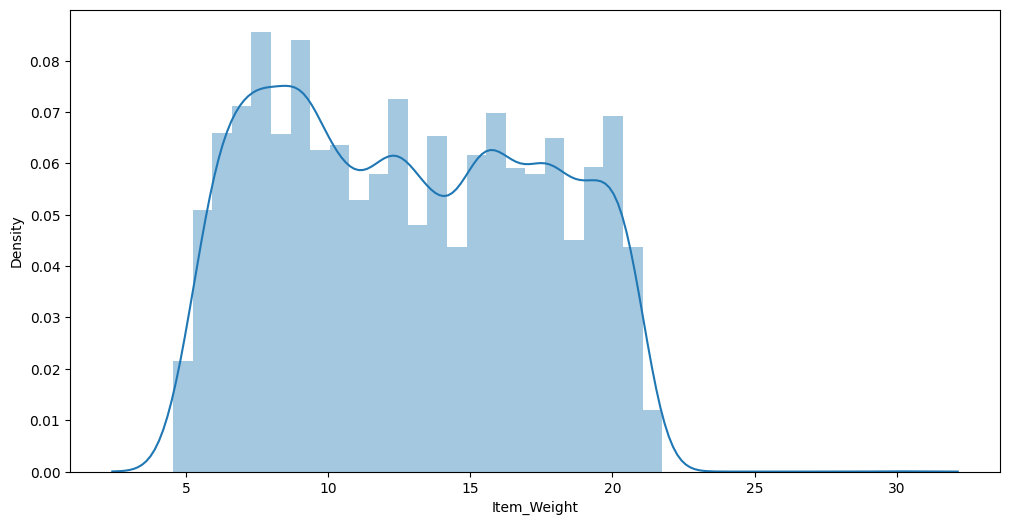

In [61]:
import matplotlib.pyplot as plt

#Item_Weight distribution
plt.figure(figsize=(12,6))
sns.distplot(df['Item_Weight'])
plt.show()

In [ ]:
sns.histplot(data=df, x="Item_Weight",y="Item_Outlet_Sales", hue="Item_MRP")


In [66]:
r

NameError: ignored

**Get the Summary Statistics**